In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import csv
import urllib.request
%matplotlib inline

import librosa
import numpy as np
import os
import librosa.display
import seaborn as sns

import IPython.display as ipd

In [2]:
# Opening dataset

df = pd.read_csv('bird_song_dataset.csv')
df.head()

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,rmk,bird-seen,animal-seen,playback-used,temp,regnr,auto,dvc,mic,smp
0,36065,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,Frank Lambert,Peru,between Jaen and San Ignacio,NaN,...,This taxon is more usually called Chinchipe Sp...,unknown,unknown,unknown,NaN,NaN,no,NaN,NaN,44100
1,692727,Arremon,dorbignii,NaN,birds,Moss-backed Sparrow,Jacob Wijpkema,Bolivia,"Franz Tamayo, La Paz Department",-14.41850,...,"In Bolivia this is now called ""Moss-backed Spa...",yes,yes,no,NaN,NaN,no,NaN,NaN,44100
2,296852,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,Ross Gallardy,Peru,"San Ignacio, Cajamarca",-5.49810,...,NaN,yes,yes,yes,NaN,NaN,no,NaN,NaN,44100
3,296851,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,Ross Gallardy,Peru,"San Ignacio, Cajamarca",-5.49810,...,NaN,yes,yes,yes,NaN,NaN,no,NaN,NaN,44100
4,27768,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,David Edwards,Peru,Chirinos,-5.24667,...,NaN,unknown,unknown,unknown,NaN,NaN,no,NaN,NaN,44100


* Performing Data Analysis

In [3]:
# check null columns
df.isnull()

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,rmk,bird-seen,animal-seen,playback-used,temp,regnr,auto,dvc,mic,smp
0,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,True,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,True,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
4,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,True,False
496,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
497,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
498,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False


In [4]:
df['cnt'].unique()

array(['Peru', 'Bolivia', 'Argentina', 'Papua New Guinea', 'New Zealand',
       'Uruguay', 'Brazil', 'Paraguay', 'Australia', 'Indonesia',
       'Zambia', 'South Africa', 'Senegal', 'India', 'Thailand', 'China',
       'Mongolia', 'Russian Federation', 'South Korea', 'Japan',
       'Cambodia', 'United States', 'Ecuador', 'Colombia', 'Venezuela',
       'Costa Rica', 'Honduras', 'El Salvador', 'Nicaragua', 'Panama',
       'Mexico', 'Guatemala'], dtype=object)

In [5]:
df.columns

Index(['id', 'gen', 'sp', 'ssp', 'group', 'en', 'rec', 'cnt', 'loc', 'lat',
       'lng', 'alt', 'type', 'sex', 'stage', 'method', 'url', 'file',
       'file-name', 'sono', 'osci', 'lic', 'q', 'length', 'time', 'date',
       'uploaded', 'also', 'rmk', 'bird-seen', 'animal-seen', 'playback-used',
       'temp', 'regnr', 'auto', 'dvc', 'mic', 'smp'],
      dtype='object')

In [6]:
df['url'].isnull().sum()

0

In [7]:
df['type'].unique()

array(['call, song', 'song', 'call', 'rattle', 'duet, song', 'duet',
       'alarm (take off)', 'alarm call', 'song, song a',
       'call, flight call, call & flight call', 'fligth', '?',
       'flight call', 'flight call, water lapping',
       'flight call, caco frog', 'alarm call, call',
       'wings flapping sound', 'takeoff noise', 'wingbeats', 'call, duet',
       'canto', 'call, song, call and song', 'alarm call, alarm calls',
       'call, calls', 'call, alternate call', 'song?',
       'call, song, calls. song.', 'chorus', 'flock', 'call, ?',
       'dawn chorus', 'song, duet?', 'uncertain', 'call, allarm calls',
       'call, song, calls', 'call, aggression calls', 'alarm call?',
       'call, calls. wing whirrs.',
       'alarm call, alarm calls, wing sounds',
       'alarm call, agitated alarm calls', 'call, wing sound',
       'wing whirr', 'begging call', 'call, agitated calls',
       'call, contact calls',
       'call, song, contact calls and song by a pair', 'dawn 

# unique species

In [29]:
print("There are {:,} unique bird species in the dataset.".format(len(df['sp'].unique())))

There are 16 unique bird species in the dataset.


## Time of recording
📌Note: Majority of the data was registered between 2013 and 2019, during the months january upto december


In [37]:
# Create some time features by spliting the column for date
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['day_of_month'] = df['date'].apply(lambda x: x.split('-')[2])

In [39]:
df['month']

0      07
1      12
2      06
3      06
4      08
       ..
495    04
496    05
497    05
498    05
499    03
Name: month, Length: 500, dtype: object

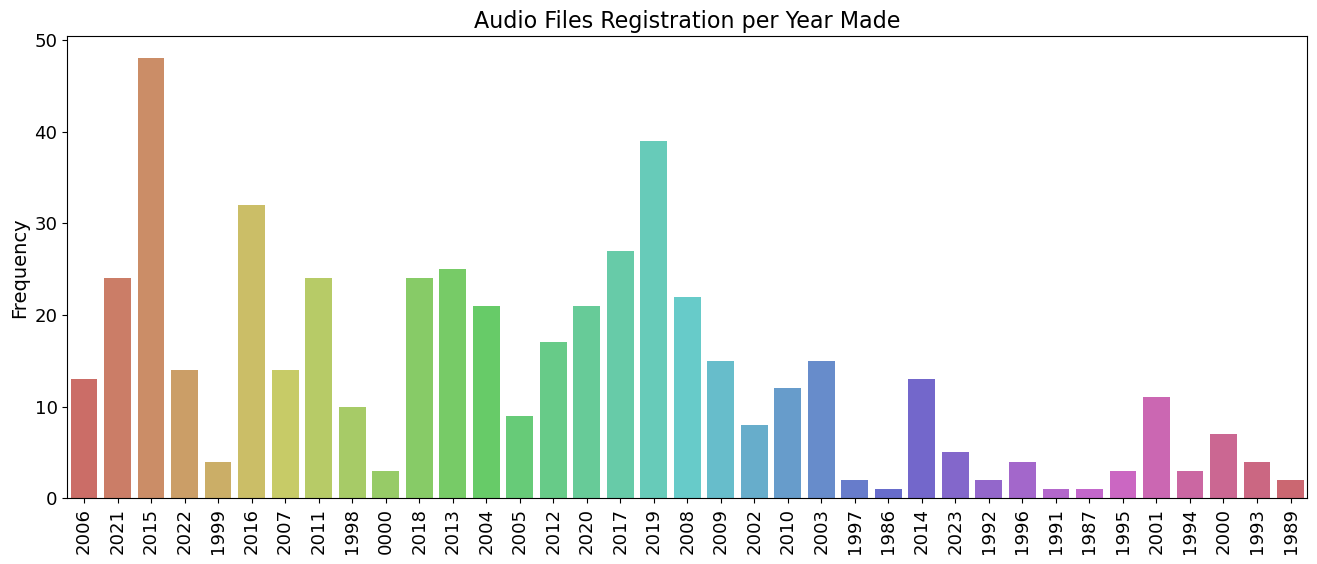

In [43]:
# crerate count plots for  audio files and the year they were created
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='year', palette="hls")

plt.title("Audio Files Registration per Year Made", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("")
plt.show()

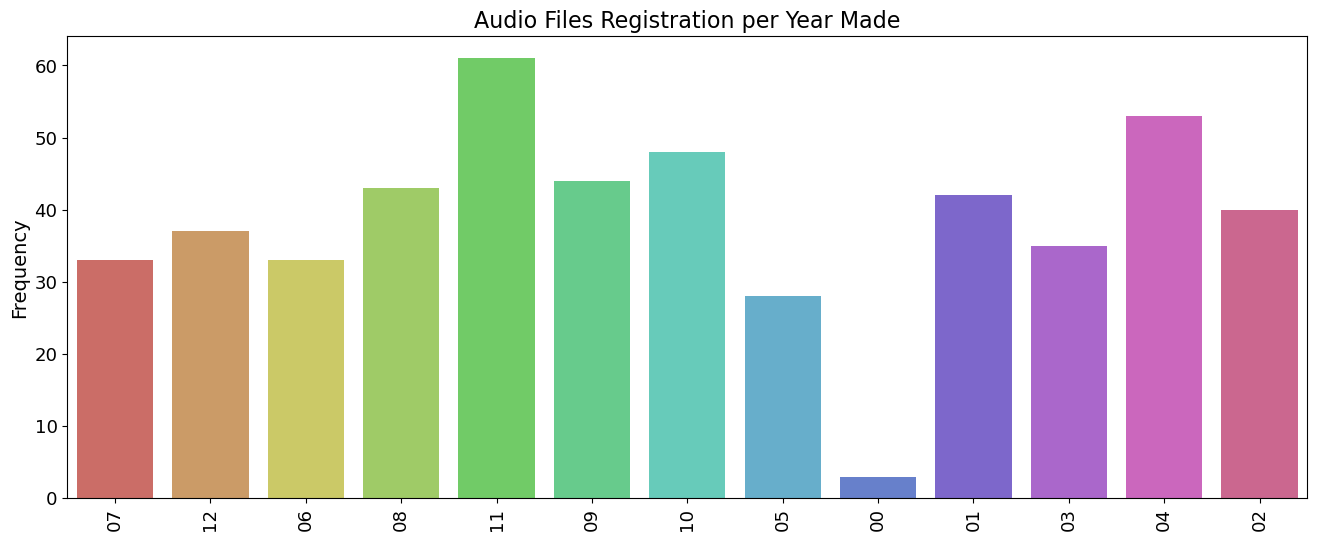

In [44]:
# crerate count plots for  audio files and the month they were created
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='month', palette="hls")

plt.title("Audio Files Registration per Year Made", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("")
plt.show()

## type column
📌Note: This column is a bit messy, as the same description can be found under multiple names. Also, there can be multiple descriptions for multiple sounds (one bird song can mean a different thing from another one in the same recording). Some examples are:

alarm call is: alarm call | alarm call, call
flight call is: flight call | call, flight call etc.

In [45]:
# Create a new variable type by exploding all the values
adjusted_type = df['type'].apply(lambda x: x.split(',')).reset_index().explode("type")

# Strip off white spaces and convert to lowercase characters
adjusted_type = adjusted_type['type'].apply(lambda x: x.strip().lower()).reset_index()
adjusted_type['type'] = adjusted_type['type'].replace('calls', 'call')

In [47]:
adjusted_type['type'].unique()

array(['call', 'song', 'rattle', 'duet', 'alarm (take off)', 'alarm call',
       'song a', 'flight call', 'call & flight call', 'fligth', '?',
       'water lapping', 'caco frog', 'wings flapping sound',
       'takeoff noise', 'wingbeats', 'canto', 'call and song',
       'alarm calls', 'alternate call', 'song?', 'calls. song.', 'chorus',
       'flock', 'dawn chorus', 'duet?', 'uncertain', 'allarm calls',
       'aggression calls', 'alarm call?', 'calls. wing whirrs.',
       'wing sounds', 'agitated alarm calls', 'wing sound', 'wing whirr',
       'begging call', 'agitated calls', 'contact calls',
       'contact calls and song by a pair', 'dawn song', 'empoleirando',
       'contact call', 'variation song', 'duet song'], dtype=object)

## Data preprocessing
For any audio application, it is necessary to import the data that you need to preprocess. In librosa, librosa.load can be integrated to carry on this task. Moreover, at the initial stage, it is important to extract the information of the sound file as samplig rate, duration in s etc.

In [8]:
mating_call = os.path.join("bird_sounds", "duet_calls", "10009.mp3")
mating_call

'bird_sounds/duet_calls/10009.mp3'

In [9]:
ipd.Audio(mating_call)

In [10]:
#  getting the raw audio features
print("sampling rate: ", librosa.get_samplerate(mating_call))
print("Duration: ", librosa.get_duration(filename=mating_call))

# import the audio files
mating_signal, sampling_rate = librosa.load(mating_call, sr=44100, mono=False)

# Shape of features
print("Shape of Initial Data : "+ str(mating_signal.shape))

sampling rate:  44100
Duration:  5.6315873015873015


/tmp/ipykernel_6131/1953578525.py:3: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  print("Duration: ", librosa.get_duration(filename=mating_call))


Shape of Initial Data : (248353,)


In [11]:
print(mating_signal)

[ 0.02445827  0.01864603 -0.00348234 ...  0.01569767  0.01036277
  0.00290306]


## DATA Visualization
 ENSURE THAT ALL FILES ARE COMPATIBLE TO THE MODEL
 

In [12]:
alarm_call = os.path.join("bird_sounds", "alarm_calls", "2679.mp3")
mating_call = os.path.join("bird_sounds", "duet_calls", "10009.mp3")
other_call = os.path.join("bird_sounds", "other_calls", "10011.mp3")

In [13]:
alarm_call
mating_call
other_call

'bird_sounds/other_calls/10011.mp3'

In [14]:
ipd.Audio(mating_call)

In [15]:
ipd.Audio(other_call)

In [16]:
ipd.Audio(alarm_call)

In [17]:
alarm_call_y, alarm_call_sr = librosa.load(alarm_call)
print(f'y:{alarm_call_y[:10]}')
print(f'shape y:{alarm_call_y.shape}')
print(f'sr:{alarm_call_sr}')




y:[ 4.6566129e-10 -5.1222742e-09  1.8626451e-09 -6.9849193e-10
  2.7939677e-09 -5.8207661e-09  2.0954758e-09 -8.3819032e-09
 -3.2596290e-09 -6.7520887e-09]
shape y:(1112256,)
sr:22050


In [18]:
pd.Series(alarm_call_y)

0          4.656613e-10
1         -5.122274e-09
2          1.862645e-09
3         -6.984919e-10
4          2.793968e-09
               ...     
1112251    4.981181e-02
1112252    4.840443e-02
1112253    5.321065e-02
1112254    4.838865e-02
1112255    5.818506e-02
Length: 1112256, dtype: float32

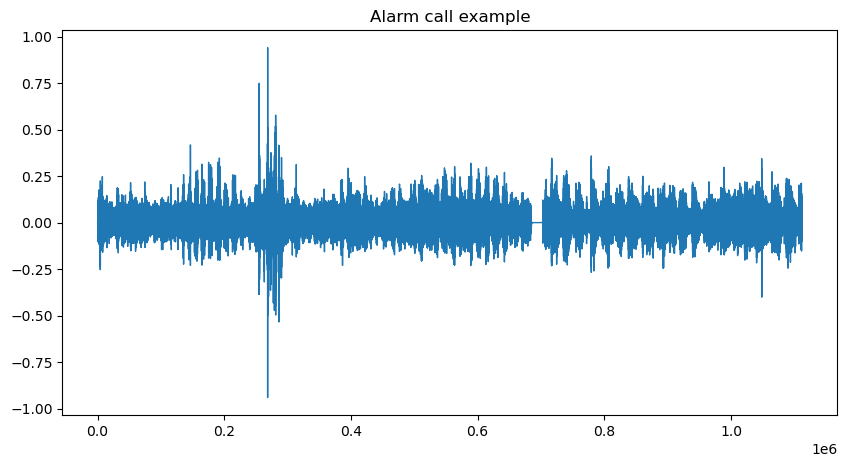

In [19]:
# plotting the numpy array of the audio
pd.Series(alarm_call_y).plot(figsize = (10, 5), lw=1,                 
                             title = "Alarm call example")
plt.show()

In [20]:
mating_call_y, mating_call_sr = librosa.load(mating_call)
print(f'y:{mating_call_y[:10]}')
print(f'shape y:{mating_call_y.shape}')
print(f'sr:{mating_call_sr}')

y:[ 0.01797861  0.00306758 -0.01609175 -0.01392592  0.0006107  -0.0095885
 -0.01828765  0.01992371  0.03507416  0.01223934]
shape y:(124177,)
sr:22050


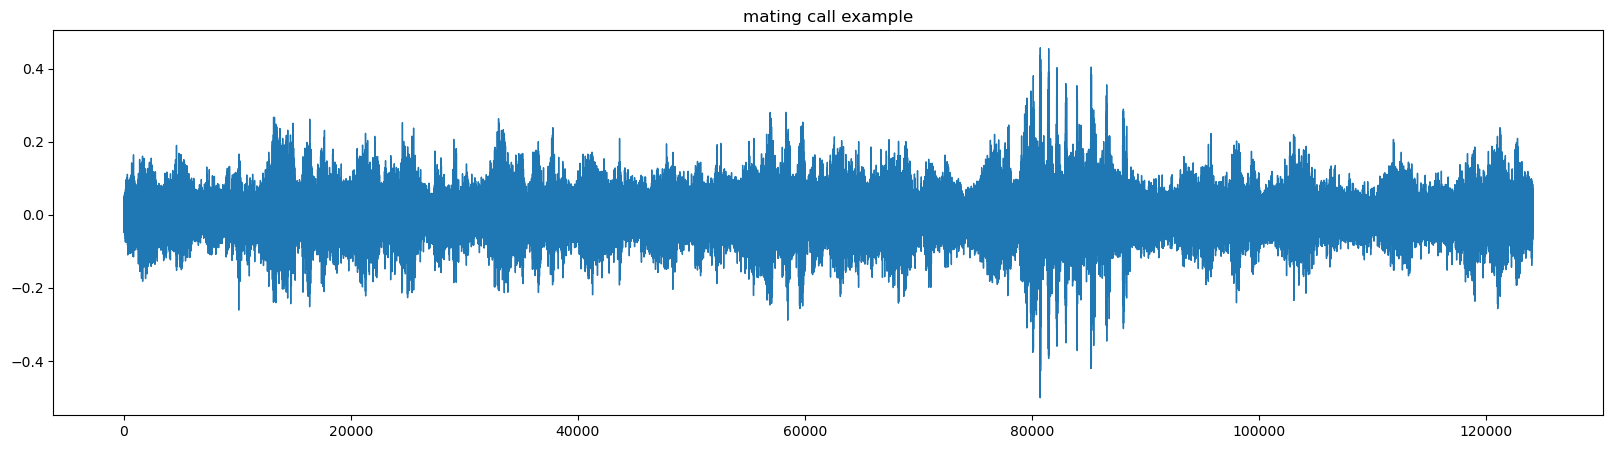

In [21]:
pd.Series(mating_call_y).plot(figsize = (20, 5), lw=1,
                 title = "mating call example")
plt.show()

In [22]:
other_call_y, other_call_sr = librosa.load(other_call)
print(f'y:{other_call_y[:10]}')
print(f'shape y:{other_call_y.shape}')
print(f'sr:{other_call_sr}')

y:[ 0.00512468 -0.00375166  0.01177869  0.02580953  0.01170507  0.01224367
 -0.00228665 -0.02078354  0.0018915   0.01605644]
shape y:(78972,)
sr:22050


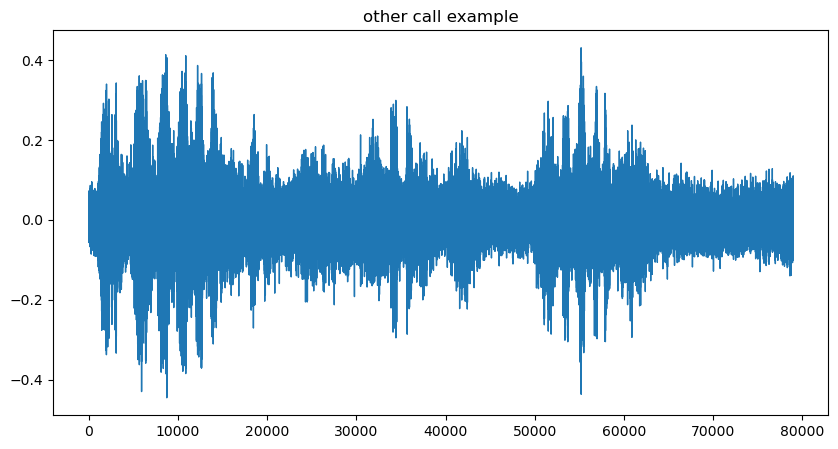

In [23]:
pd.Series(other_call_y).plot(figsize = (10, 5), lw=1,
                 title = "other call example")
plt.show()

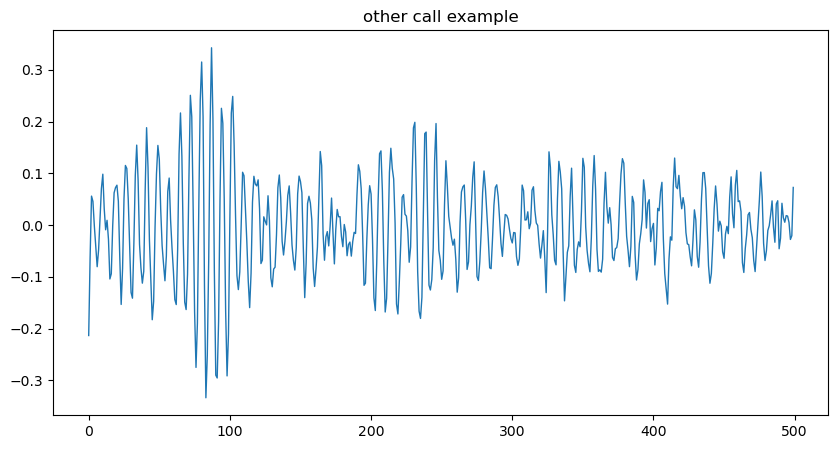

In [24]:
pd.Series(other_call_y[3000:3500]).plot(figsize = (10, 5), lw=1,
                 title = "other call example")
plt.show()

Fast Fourier Transformation

## spectogramm

In [25]:
D = librosa.stft(alarm_call_y)
s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
s_db.shape

(1025, 2173)

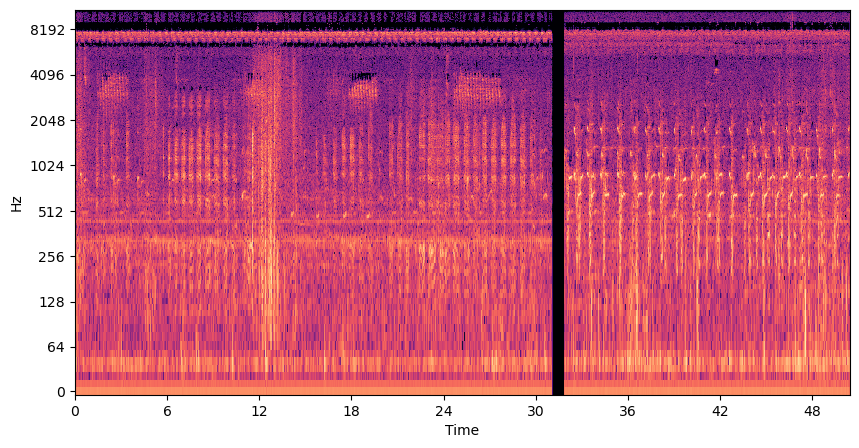

In [26]:
fig, ax = plt.subplots(figsize = (10, 5))
img = librosa.display.specshow(s_db,
                              x_axis = 'time',
                              y_axis = 'log',
                              ax= ax)

## MEL SPECTROGRAM

In [27]:
S = librosa.feature.melspectrogram(y = alarm_call_y,
                                  sr = alarm_call_sr,
                                  n_mels = 128,
                                  )
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

Text(0.5, 1.0, 'Mel spectrogram for alarm call ')

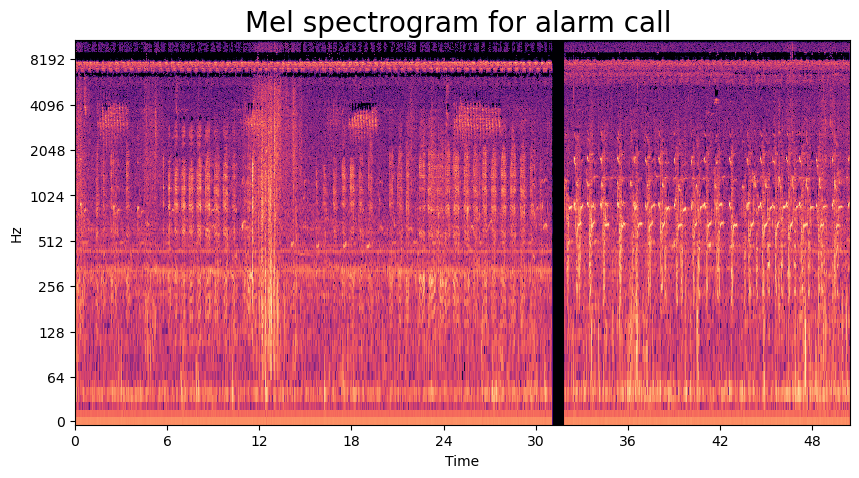

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(s_db,
                              x_axis = 'time',
                              y_axis = 'log',
                              ax= ax)
ax.set_title('Mel spectrogram for alarm call ', fontsize = 20)